Freelance заказ, клиенту требуется собрать все данные о калорийности продуктов со страницы сайта

In [19]:
!pip install beautifulsoup4 requests lxml

In [20]:
import requests
from bs4 import BeautifulSoup
import csv
import random
from time import sleep
import json

In [21]:
url = 'https://health-diet.ru/table_calorie/?utm_source=leftMenu&utm_medium=table_calorie'
url

'https://health-diet.ru/table_calorie/?utm_source=leftMenu&utm_medium=table_calorie'

In [22]:
request = requests.get(url)
request

<Response [200]>

In [23]:
src = request.text
# src

In [24]:
with open('health-diet.html', 'w', encoding='utf-8') as file:
    file.write(src)
file

<_io.TextIOWrapper name='health-diet.html' mode='w' encoding='utf-8'>

In [25]:
with open('health-diet.html', encoding='utf-8') as file:
    src = file.read()

In [26]:
# src

In [27]:
soup = BeautifulSoup(src, 'lxml')
# soup

In [28]:
all_products_tags = soup.find_all(class_='mzr-tc-group-item-href') # каждая ссылка продукта находится в классе `mzr-tc-group-item-href`.
all_products_tags

[<a class="mzr-tc-group-item-href" href="/base_of_food/food_24507/" title="Химический состав продукта: Баранина и дичь">Баранина и дичь</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24523/" title="Химический состав продукта: Бобовые">Бобовые</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24509/" title="Химический состав продукта: Вода и напитки">Вода и напитки</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24502/" title="Химический состав продукта: Говядина и телятина">Говядина и телятина</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24513/" title="Химический состав продукта: Грибы">Грибы</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24526/" title="Химический состав продукта: Детское питание">Детское питание</a>,
 <a class="mzr-tc-group-item-href" href="/base_of_food/food_24515/" title="Химический состав продукта: Жиры и масла">Жиры и масла</a>,
 <a class="mzr-tc-group-item-href" href="/base_of

In [29]:
all_iterations = len(all_products_tags) - 1

In [30]:
for hyperlink in all_products_tags:
        print(f'Iterations left: {all_iterations}')
        href = 'https://health-diet.ru' + hyperlink['href']
        name = hyperlink.text
        
        request = requests.get(href)
        src = request.text # full html code, in string format, stored here
    
        soup = BeautifulSoup(src, 'lxml')

        # Проверяем на наличие таблицы, вдруг выйдет "страница не найдена"
        alert = soup.find(class_='uk-alert-danger')
        if alert is not None:
            continue
    
        table_heads = soup.find(class_='mzr-tc-group-table').find('thead').find_all('th') 
        product = table_heads[0].text
        calories = table_heads[1].text

        with open('product_title_calories_csv.csv', 'a', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(
                [product, 
                 calories]
            )
            
        table_body = soup.find(class_='mzr-tc-group-table').find('tbody').find_all('tr')

        product_title_calories = []
        for table_row in table_body:
            list_table_data = table_row.find_all('td')
            title = list_table_data[0].find('a').text
            calories = list_table_data[1].text

            replace_this_characters = [',', ' ', '-', "'", '[', ']'] # хочу заменить такие чары на "_"
            for char in replace_this_characters:
                if char in title:
                    title = title.replace(char, '_')


            product_title_calories.append({
                'Title': title,
                'Calories': calories
            })

            with open('product_title_calories_csv.csv', 'a', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(
                    [title, 
                     calories
                    ]
                )
            
        with open('product_title_calories_json.json', 'a', encoding='utf-8') as file:
                json.dump(product_title_calories, file, indent=4, ensure_ascii=False)

        all_iterations -= 1

Iterations left: 54
Iterations left: 53
Iterations left: 52
Iterations left: 51
Iterations left: 50
Iterations left: 49
Iterations left: 48
Iterations left: 47
Iterations left: 46
Iterations left: 45
Iterations left: 44
Iterations left: 43
Iterations left: 42
Iterations left: 41
Iterations left: 40
Iterations left: 39
Iterations left: 38
Iterations left: 37
Iterations left: 36
Iterations left: 35
Iterations left: 34
Iterations left: 33
Iterations left: 32
Iterations left: 31
Iterations left: 30
Iterations left: 29
Iterations left: 28
Iterations left: 27
Iterations left: 26
Iterations left: 25
Iterations left: 24
Iterations left: 23
Iterations left: 22
Iterations left: 21
Iterations left: 20
Iterations left: 19
Iterations left: 18
Iterations left: 17
Iterations left: 16
Iterations left: 15
Iterations left: 14
Iterations left: 13
Iterations left: 13
Iterations left: 12
Iterations left: 11
Iterations left: 10
Iterations left: 9
Iterations left: 8
Iterations left: 7
Iterations left: 6
Iter

**результаты хранятся в файлах `product_title_calories_csv.csv` и `product_title_calories_json.json`.**

# `product_title_calories_json.json`:

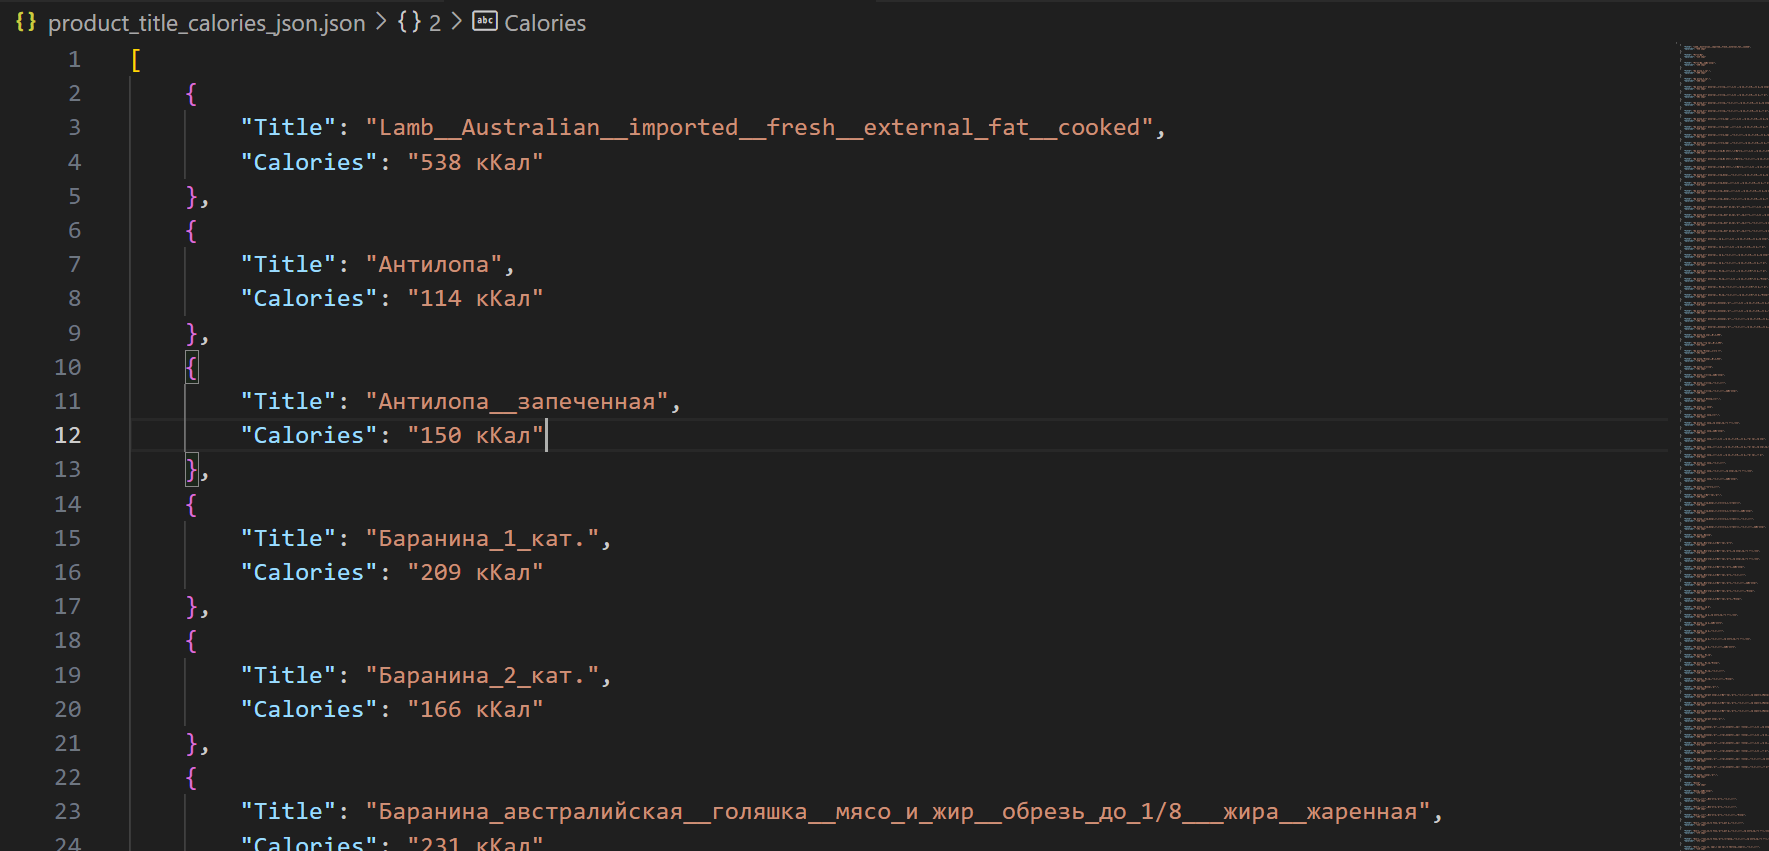

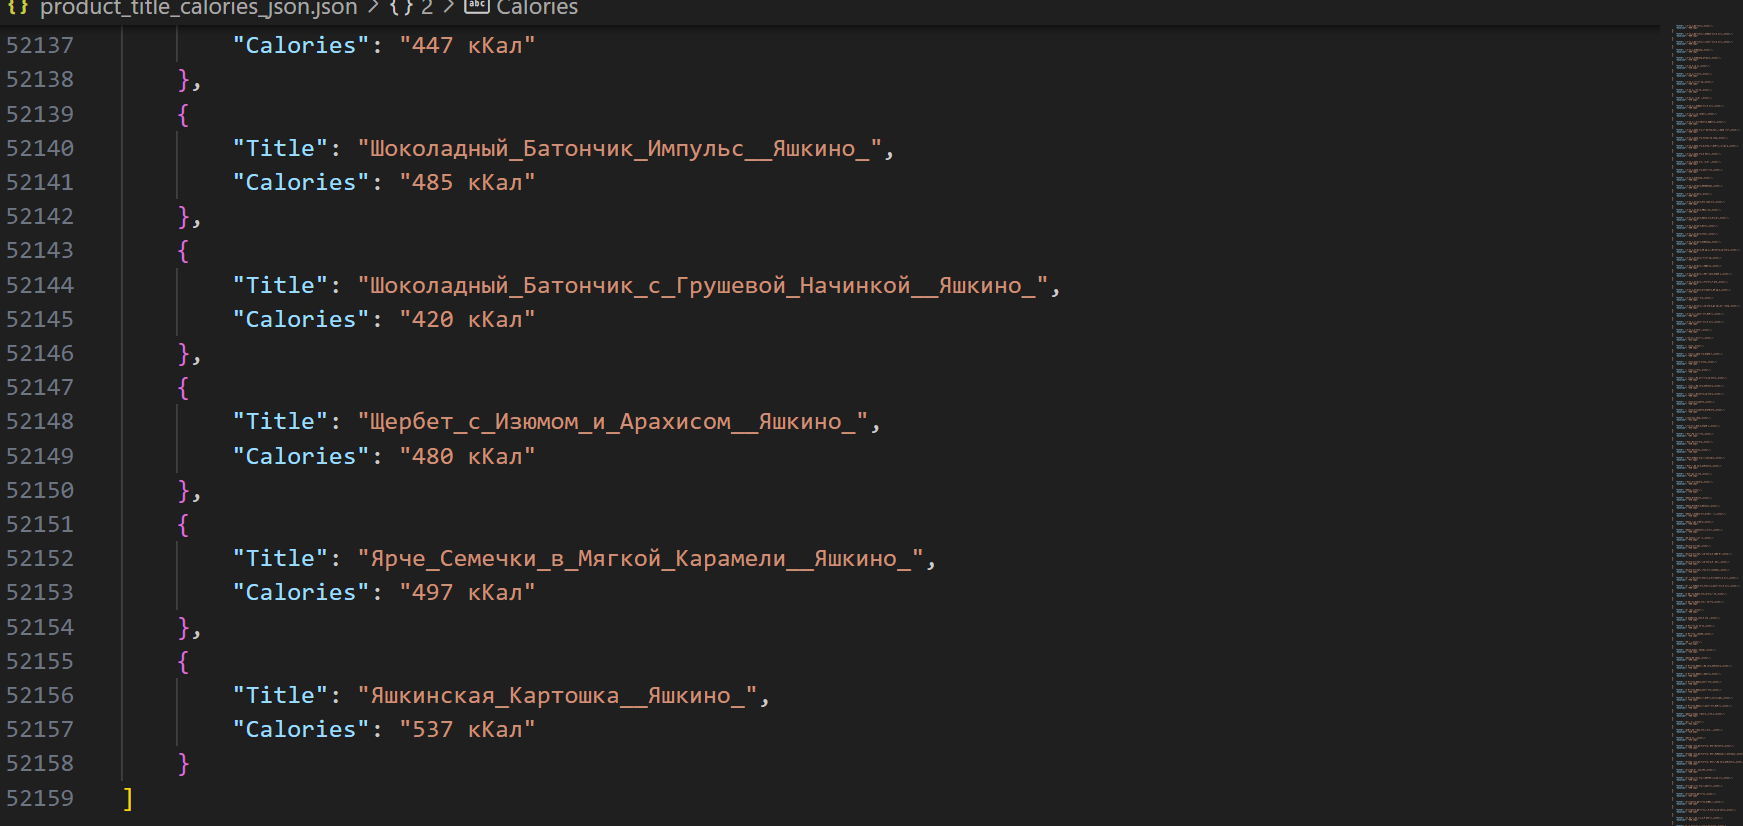

# `product_title_calories_csv.csv`:

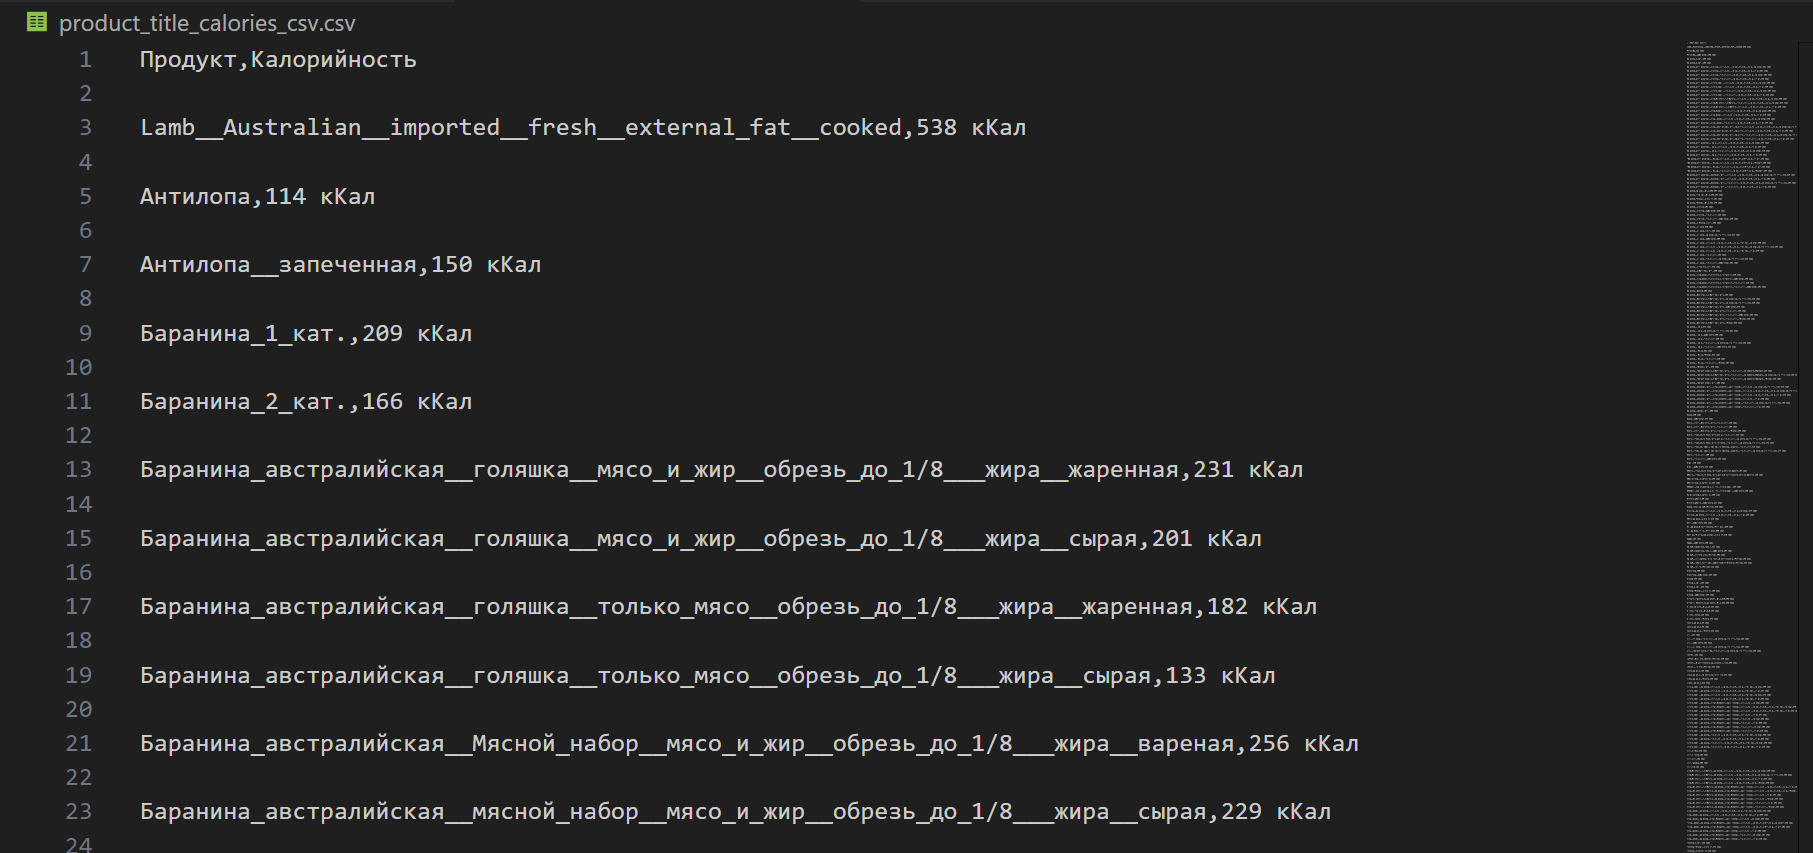

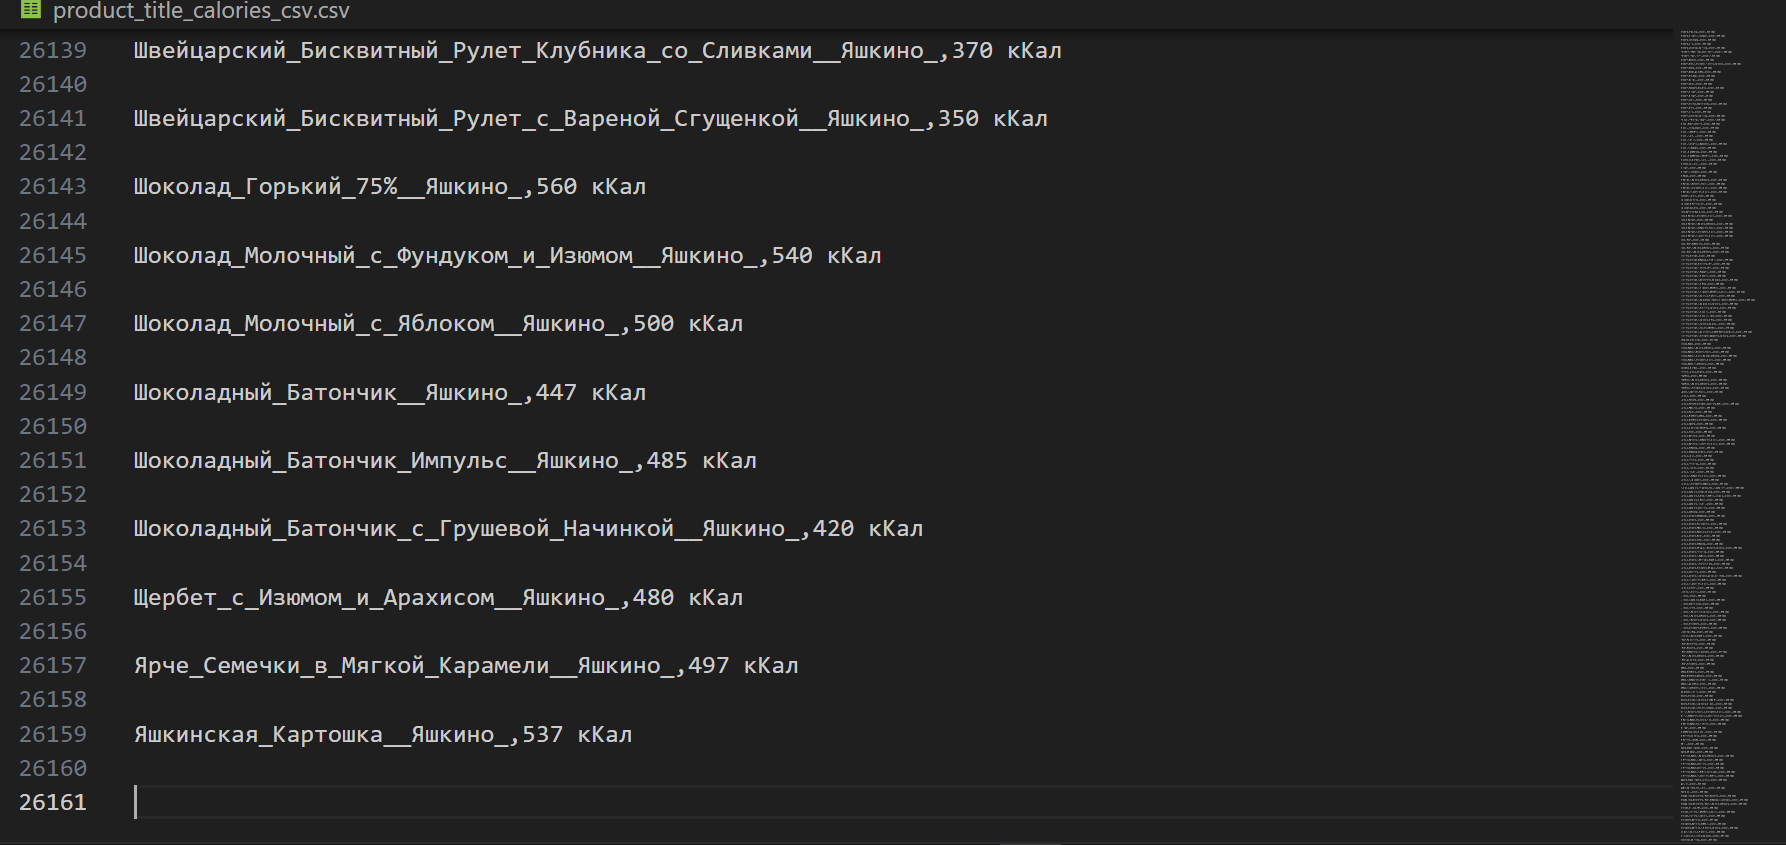